<a href="https://www.kaggle.com/code/khaledyasser4/end-to-end-ml?scriptVersionId=243697103" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from scipy import stats
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")



# Read Dataset

In [3]:
data= pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(768, 9)

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


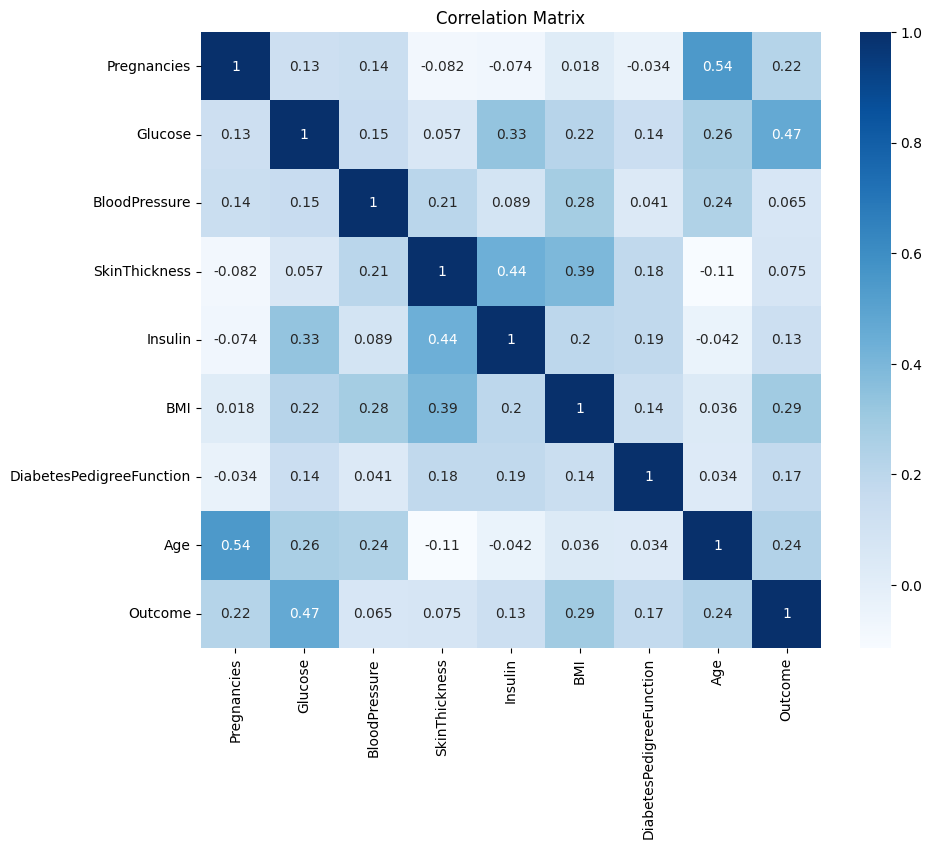

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

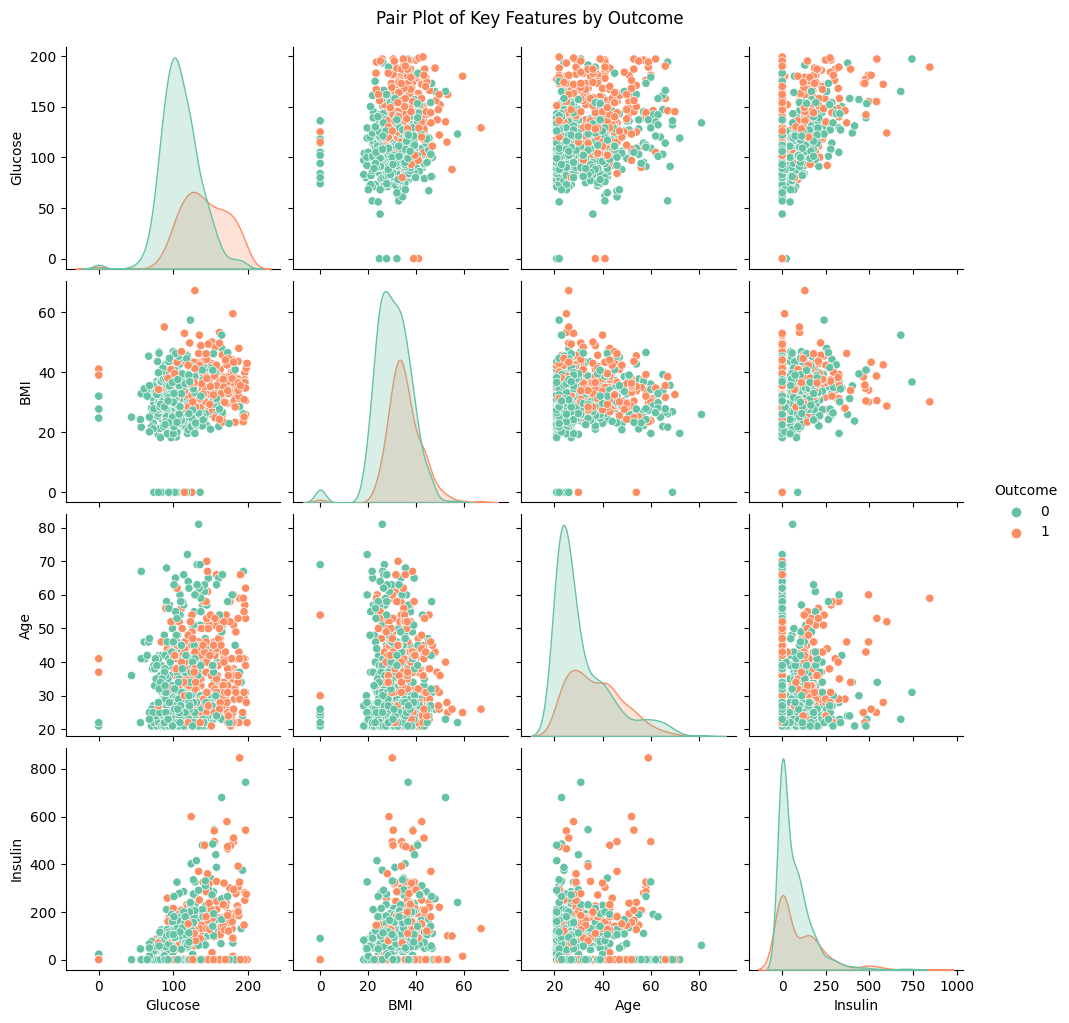

In [7]:
sns.pairplot(data, hue='Outcome', vars=['Glucose', 'BMI', 'Age', 'Insulin'], palette='Set2')
plt.suptitle('Pair Plot of Key Features by Outcome', y=1.02)
plt.show()

# Outliers

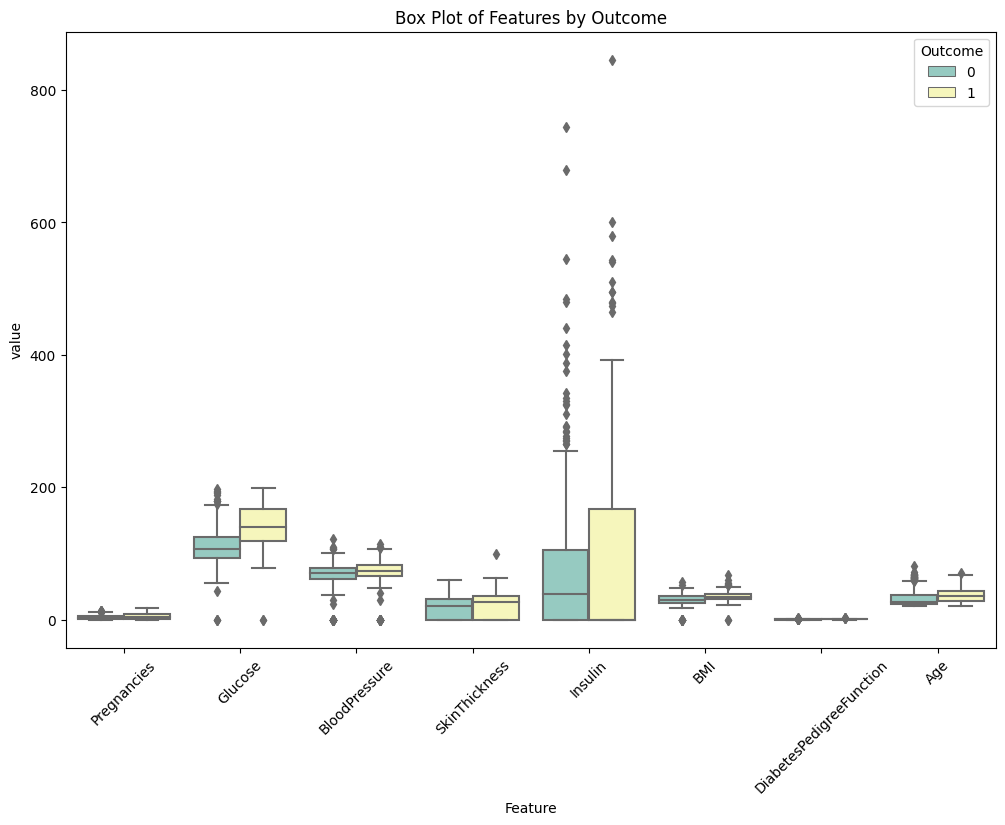

In [8]:
plt.figure(figsize=(12, 8))
data_melt = data.melt(id_vars='Outcome', var_name='Feature')
sns.boxplot(x='Feature', y='value', hue='Outcome', data=data_melt, palette='Set3')
plt.title('Box Plot of Features by Outcome')
plt.xticks(rotation=45)
plt.show()

# treat outliers

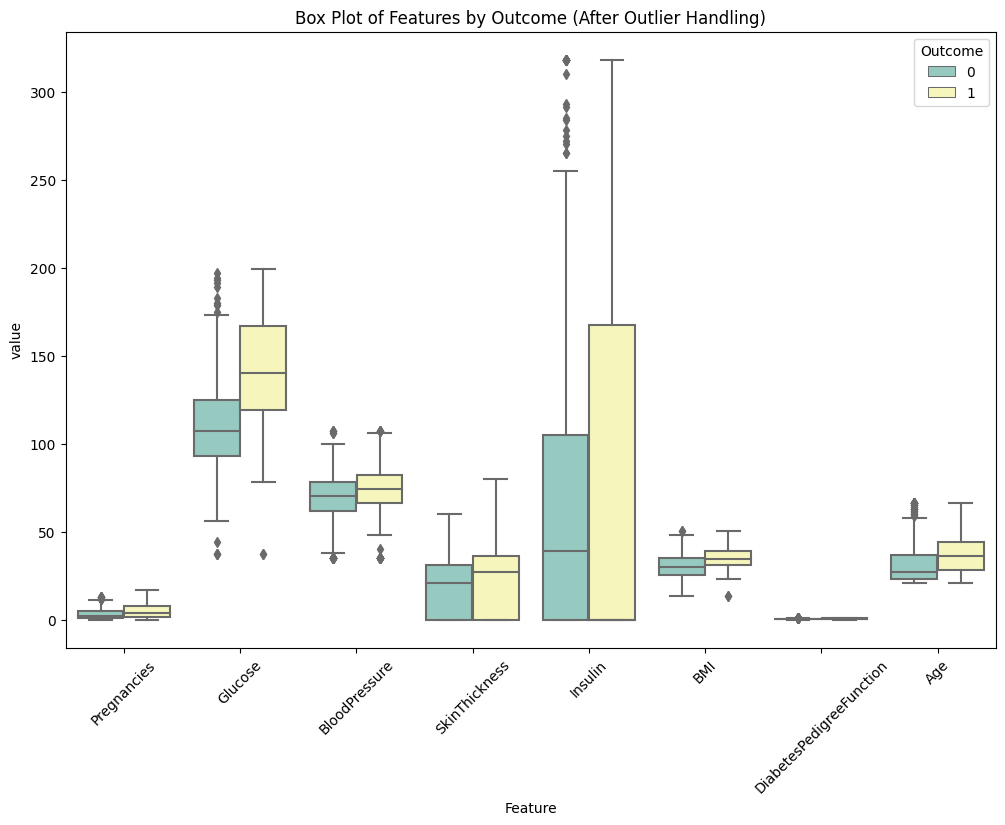

In [9]:
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)

plt.figure(figsize=(12, 8))
data_melt = data.melt(id_vars='Outcome', var_name='Feature')
sns.boxplot(x='Feature', y='value', hue='Outcome', data=data_melt, palette='Set3')
plt.title('Box Plot of Features by Outcome (After Outlier Handling)')
plt.xticks(rotation=45)
plt.show()

# Mising values

In [10]:
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    data[col] = data[col].replace(0, np.nan)
    data[col].fillna(data[col].mean(), inplace=True)

# Data split

In [11]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Models

In [13]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42,),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier(max_iter=1000, random_state=42)
}

In [14]:
model_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    model_results[name] = {'y_pred': y_pred, 'accuracy': accuracy, 'report': report}

In [15]:
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}
for name in model_results:
    results['Model'].append(name)
    results['Accuracy'].append(model_results[name]['accuracy'])
    results['Precision'].append(model_results[name]['report']['1']['precision'])
    results['Recall'].append(model_results[name]['report']['1']['recall'])
    results['F1-Score'].append(model_results[name]['report']['1']['f1-score'])
    

In [16]:
print("\n(Accuracy):")
for name, result in model_results.items():
    accuracy = result['accuracy']
    print(f"{name}: Accuracy = {accuracy:.2f}")


(Accuracy):
Logistic Regression: Accuracy = 0.74
Random Forest: Accuracy = 0.74
SVM: Accuracy = 0.75
KNN: Accuracy = 0.72
XGBoost: Accuracy = 0.70
Gradient Boosting: Accuracy = 0.76
AdaBoost: Accuracy = 0.75
Naive Bayes: Accuracy = 0.73
Neural Network: Accuracy = 0.73


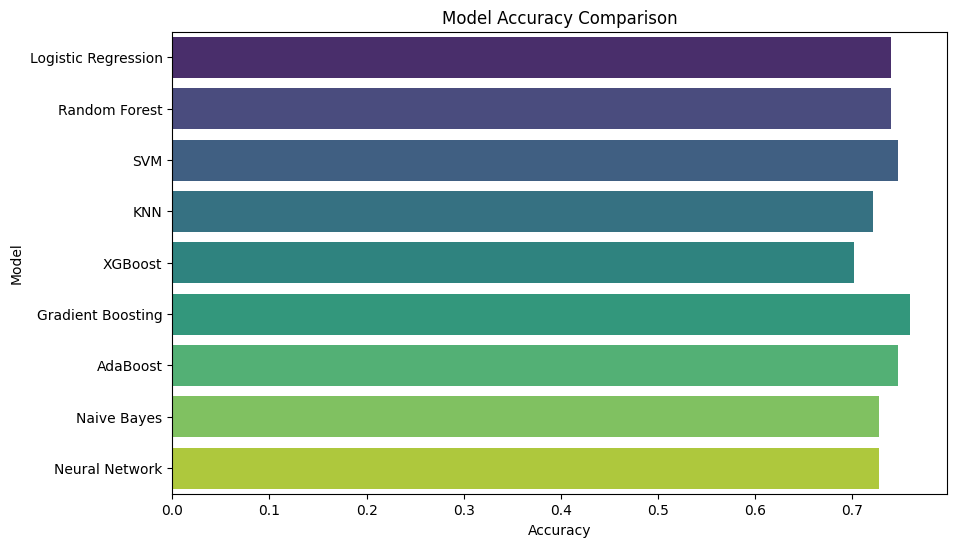

In [17]:
results_df = pd.DataFrame(results)
    
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=results_df ,palette='viridis' )
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()

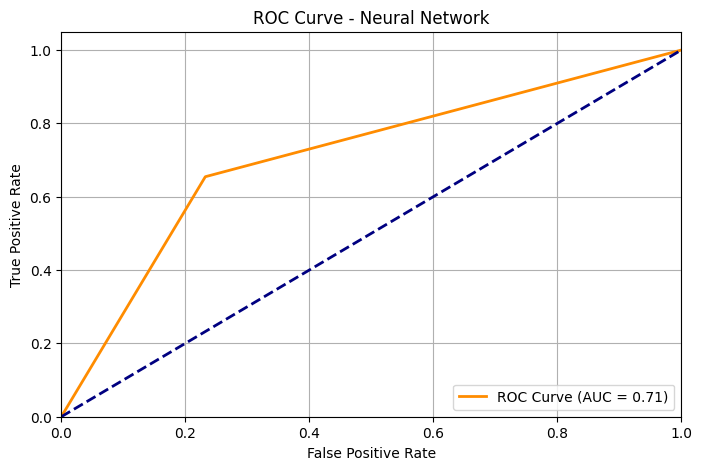

In [18]:
y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
if y_prob is not None:
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

In [19]:
initial_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    initial_results[name] = {'y_pred': y_pred, 'accuracy': accuracy, 'report': report}

# Hyperparameter Tuning

In [20]:

param_grids = {
    'XGBoost': {
        'n_estimators': [1000, 2000],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2]
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['rbf', 'linear']
    },
    'Neural Network': {
        'hidden_layer_sizes': [ (50, 50)],
        'alpha': [0.0001, 0.1]
    }
}

best_models = {}
for name, model in models.items():
    if name in param_grids:
        grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_models[name] = grid_search.best_estimator_
    else:
        best_models[name] = model

tuned_results = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    tuned_results[name] = {'y_pred': y_pred, 'accuracy': accuracy, 'report': report}



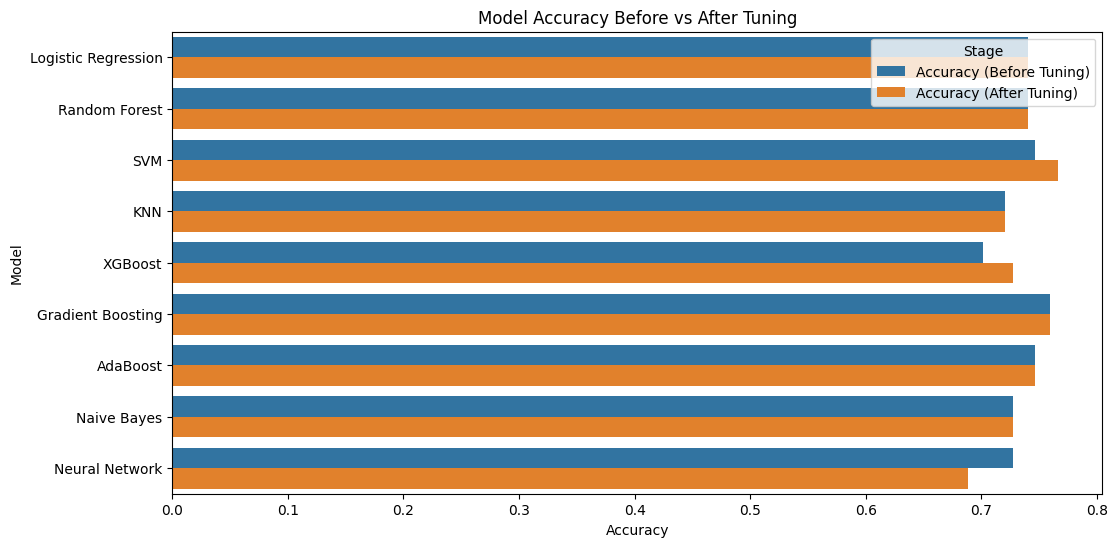

In [21]:
comparison_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Accuracy (Before Tuning)': [initial_results[m]['accuracy'] for m in models.keys()],
    'Accuracy (After Tuning)': [tuned_results[m]['accuracy'] for m in models.keys()]
})
plt.figure(figsize=(12, 6))
comparison_df_melted = pd.melt(comparison_df, id_vars='Model', var_name='Stage', value_name='Accuracy')
sns.barplot(data=comparison_df_melted, x='Accuracy', y='Model', hue='Stage')
plt.title('Model Accuracy Before vs After Tuning')
plt.show()
